For the GC + Tmin run, the reconstruction of $\gamma$ seems better for $\sigma_T=0.20$ and $\sigma_M=0.20$ than for $\sigma_T=0.10$ and $\sigma_M=0.20$. **Why is this??**

In [1]:
import sys
sys.path.append("../python/")

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import _corner
import imp
imp.reload(_corner)
from _corner import corner
from scipy.stats import gaussian_kde
import pickle
from matplotlib.offsetbox import AnchoredText
import mock_generation
imp.reload(mock_generation)
from mock_generation import mock_population
from astropy.constants import R_jup, M_jup, M_sun, L_sun
from scipy.interpolate import interp1d, interp2d
from utils import temperature, heat, temperature_withDM
from scipy.interpolate import griddata
import matplotlib.colors as colors
import utils_plots
imp.reload(utils_plots)
from utils import gNFW_rho
import pickle

import imp
import utils_plots
imp.reload(utils_plots)
from utils_plots import grid_FSE, add_hatch

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino'], 'size':22})

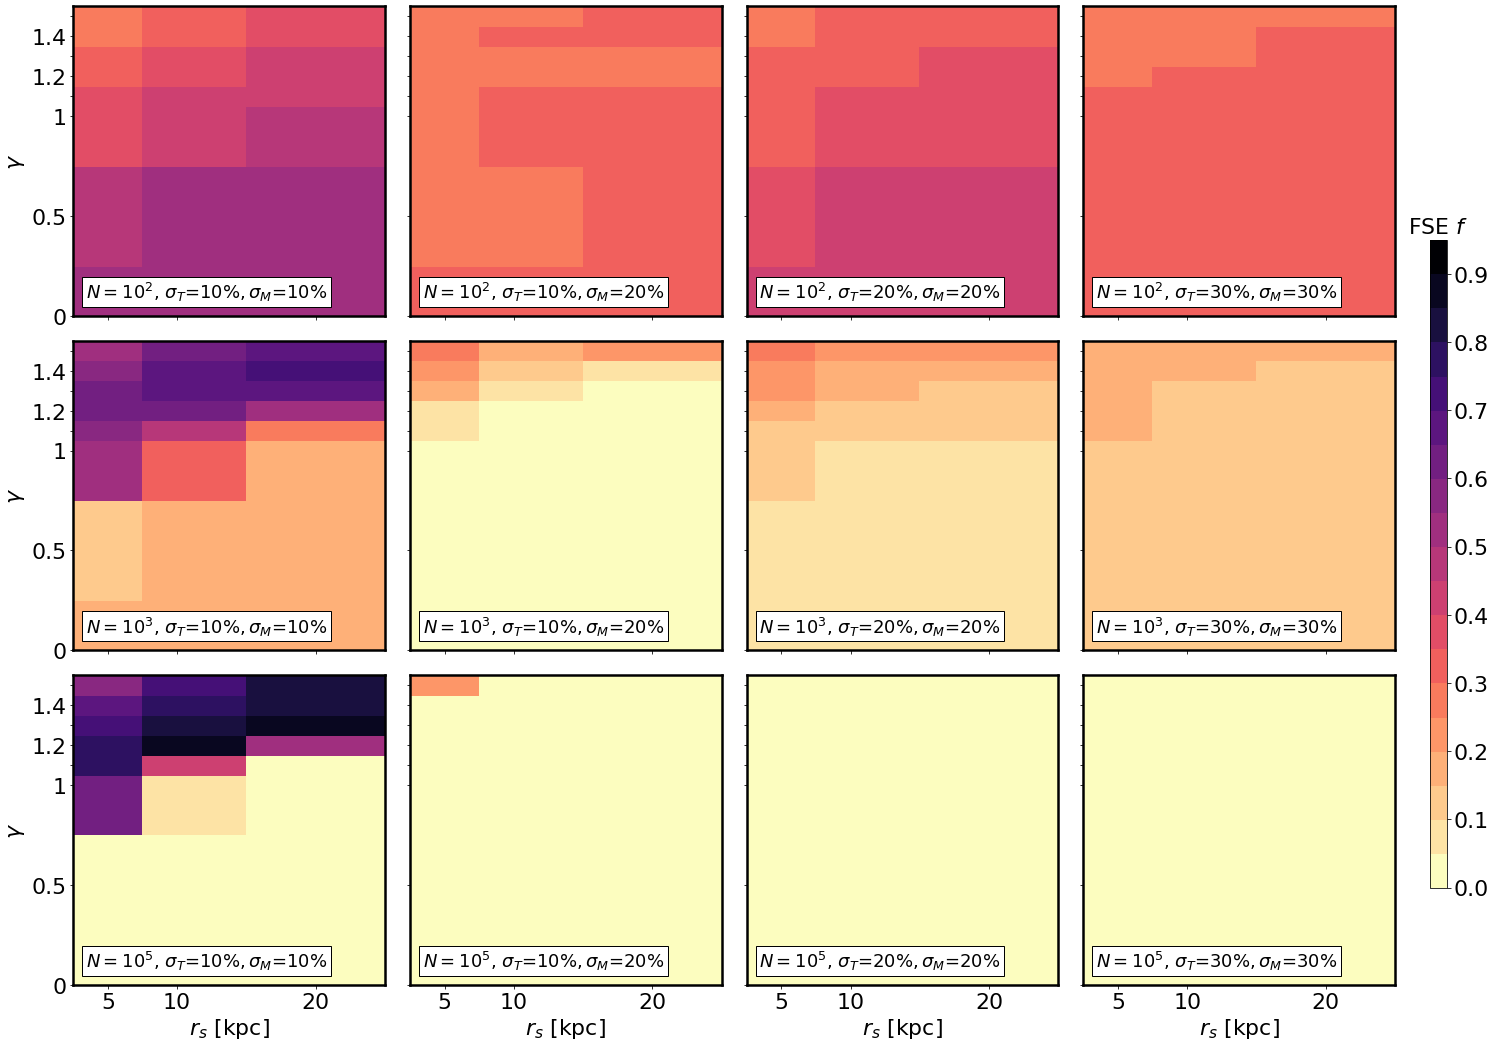

In [10]:
fig, ax = plt.subplots(3, 4, figsize=(24, 18))

path = "/home/mariacst/exoplanets/results/Tmin/"

im   = grid_FSE(path, 100, 0.1, 0.1, "ex4", ax[0, 0], "median", True, False, True, False)
im   = grid_FSE(path, 100, 0.1, 0.2, "ex4", ax[0, 1], "median", True, False, False, False)
im   = grid_FSE(path, 100, 0.2, 0.2, "ex4", ax[0, 2], "median", True, False, False, False)
im   = grid_FSE(path, 100, 0.3, 0.3, "ex4", ax[0, 3], "median", True, False, False, False)

im   = grid_FSE(path, 1000, 0.1, 0.1, "ex4", ax[1, 0], "median", True, False, True, False)
im   = grid_FSE(path, 1000, 0.1, 0.2, "ex4", ax[1, 1], "median", True, False, False, False)
im   = grid_FSE(path, 1000, 0.2, 0.2, "ex4", ax[1, 2], "median", True, False, False, False)
im   = grid_FSE(path, 1000, 0.3, 0.3, "ex4", ax[1, 3], "median", True, False, False, False)

im   = grid_FSE(path, 100000, 0.1, 0.1, "ex4", ax[2, 0], "median", True, False, True, True)
im   = grid_FSE(path, 100000, 0.1, 0.2, "ex4", ax[2, 1], "median", True, False, False, True)
im   = grid_FSE(path, 100000, 0.2, 0.2, "ex4", ax[2, 2], "median", True, False, False, True)
im   = grid_FSE(path, 100000, 0.3, 0.3, "ex4", ax[2, 3], "median", True, False, False, True)


fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([0.91, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_title("FSE $f$", size=22.)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

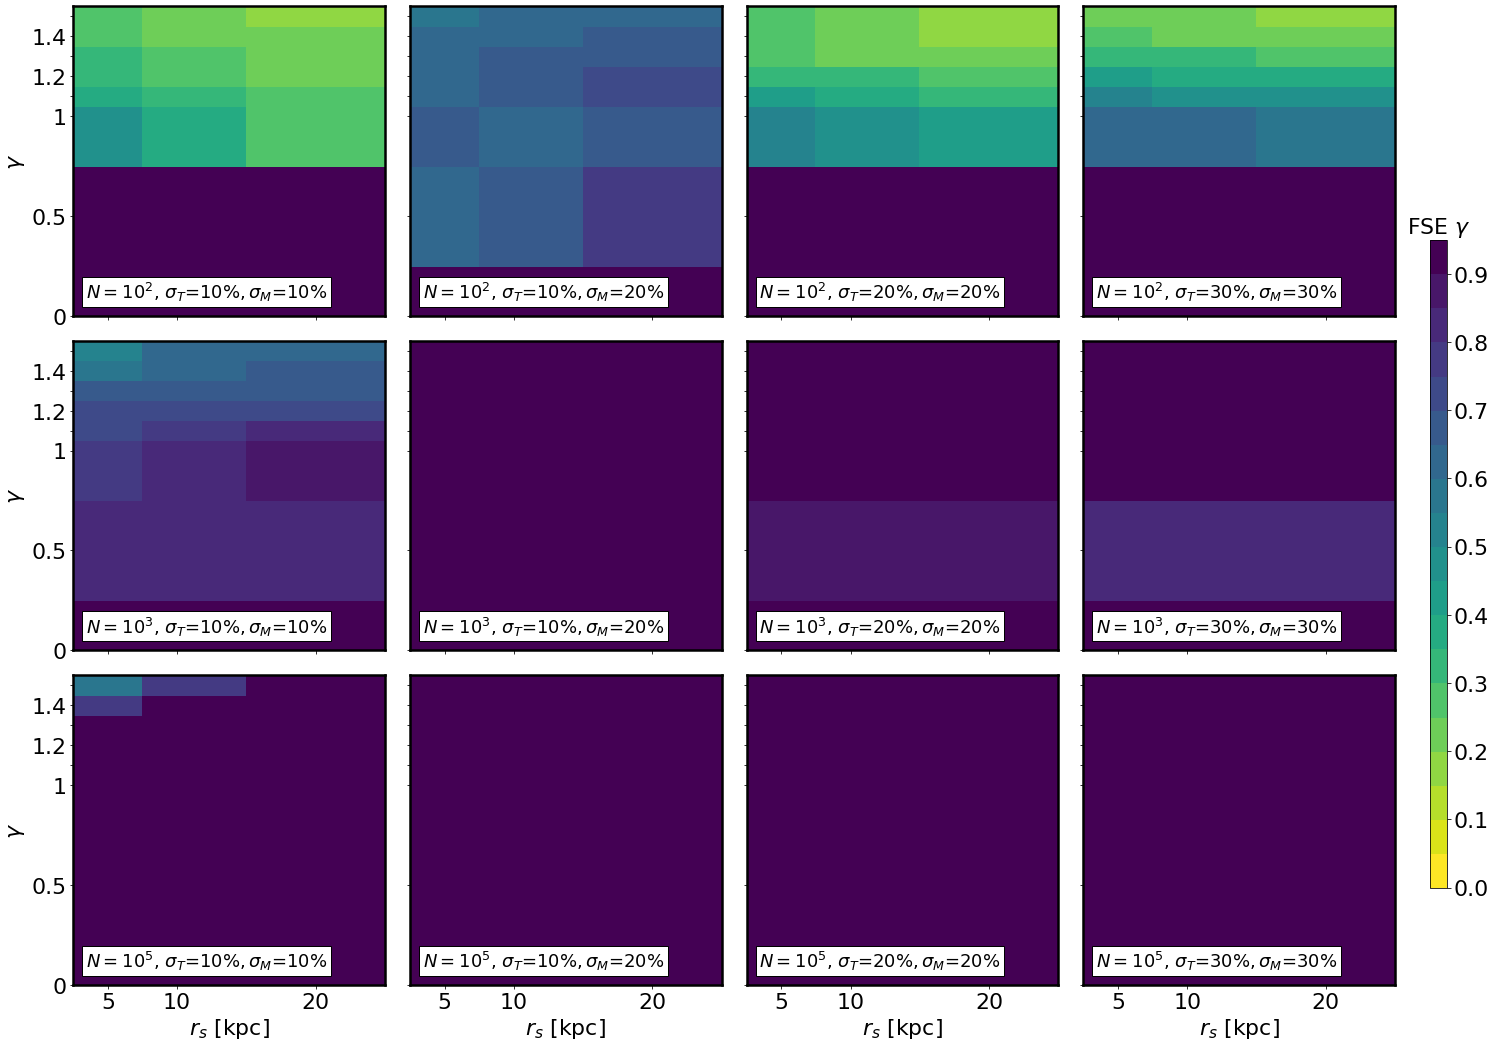

In [9]:
fig, ax = plt.subplots(3, 4, figsize=(24, 18))

path = "/home/mariacst/exoplanets/results/Tmin/"

im   = grid_FSE(path, 100, 0.1, 0.1, "ex4", ax[0, 0], "median", False, True, True, False)
im   = grid_FSE(path, 100, 0.1, 0.2, "ex4", ax[0, 1], "median", False, True, False, False)
im   = grid_FSE(path, 100, 0.2, 0.2, "ex4", ax[0, 2], "median", False, True, False, False)
im   = grid_FSE(path, 100, 0.3, 0.3, "ex4", ax[0, 3], "median", False, True, False, False)


im   = grid_FSE(path, 1000, 0.1, 0.1, "ex4", ax[1, 0], "median", False, True, True, False)
im   = grid_FSE(path, 1000, 0.1, 0.2, "ex4", ax[1, 1], "median", False, True, False, False)
im   = grid_FSE(path, 1000, 0.2, 0.2, "ex4", ax[1, 2], "median", False, True, False, False)
im   = grid_FSE(path, 1000, 0.3, 0.3, "ex4", ax[1, 3], "median", False, True, False, False)


im   = grid_FSE(path, 100000, 0.1, 0.1, "ex4", ax[2, 0], "median", False, True, True, True)
im   = grid_FSE(path, 100000, 0.1, 0.2, "ex4", ax[2, 1], "median", False, True, False, True)
im   = grid_FSE(path, 100000, 0.2, 0.2, "ex4", ax[2, 2], "median", False, True, False, True)
im   = grid_FSE(path, 100000, 0.3, 0.3, "ex4", ax[2, 3], "median", False, True, False, True)


fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([0.91, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_title(r"FSE $\gamma$", size=22.)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

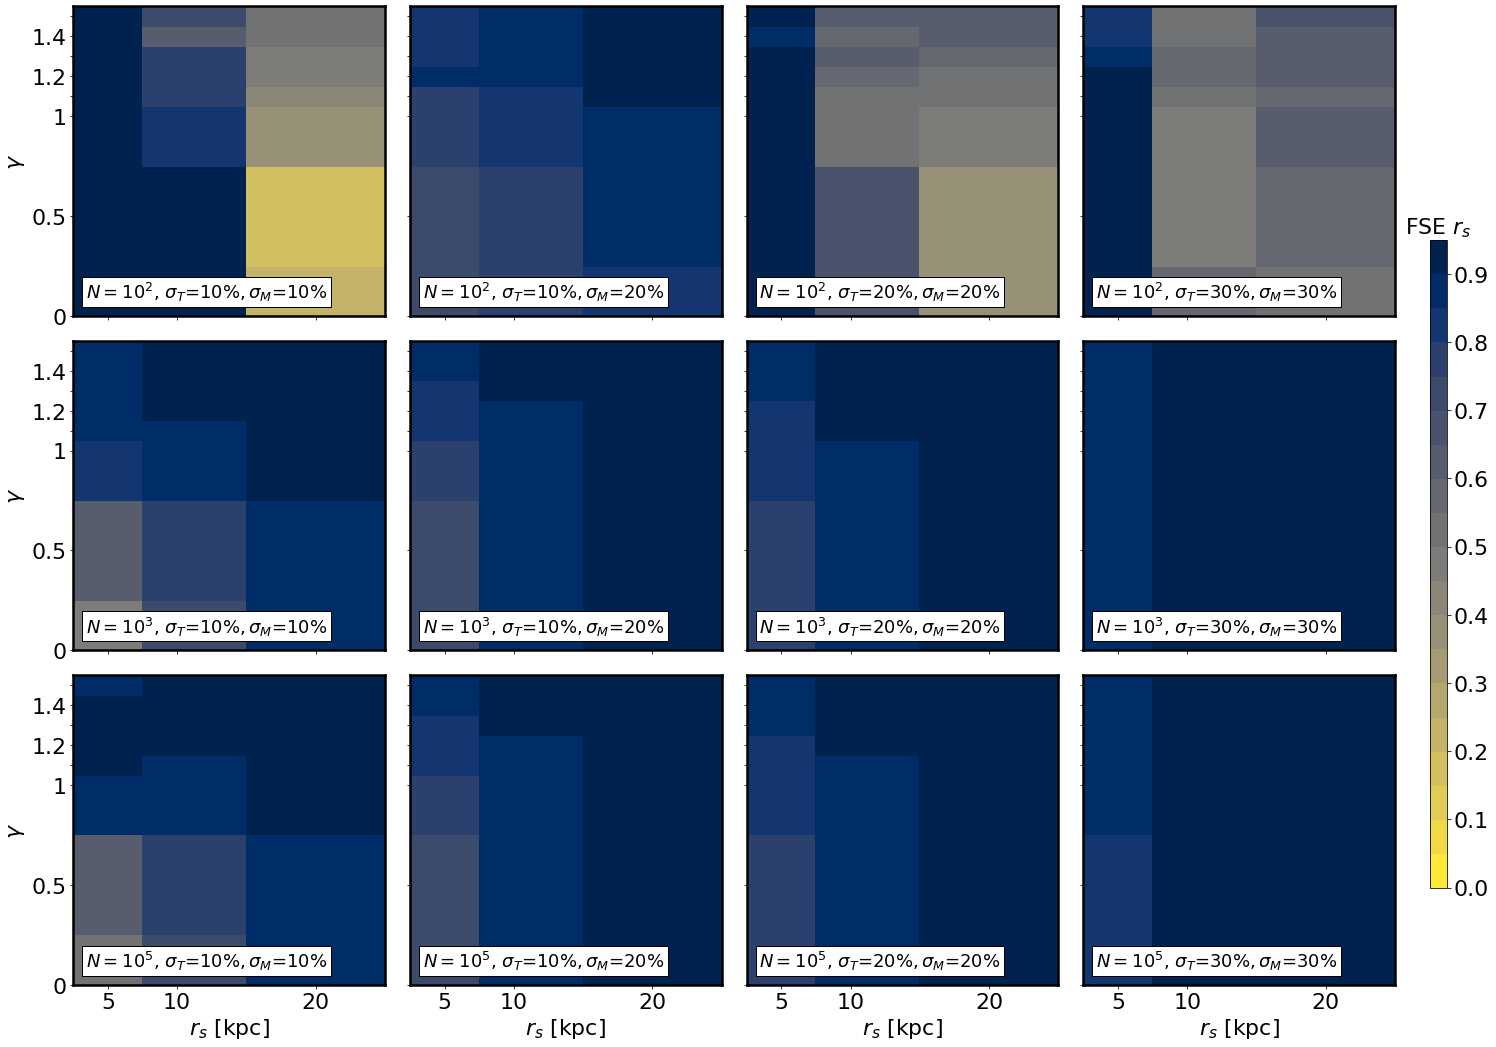

In [11]:
fig, ax = plt.subplots(3, 4, figsize=(24, 18))

path = "/home/mariacst/exoplanets/results/Tmin/"

im   = grid_FSE(path, 100, 0.1, 0.1, "ex4", ax[0, 0], "median", False, False, True, False)
im   = grid_FSE(path, 100, 0.1, 0.2, "ex4", ax[0, 1], "median", False, False, False, False)
im   = grid_FSE(path, 100, 0.2, 0.2, "ex4", ax[0, 2], "median", False, False, False, False)
im   = grid_FSE(path, 100, 0.3, 0.3, "ex4", ax[0, 3], "median", False, False, False, False)


im   = grid_FSE(path, 1000, 0.1, 0.1, "ex4", ax[1, 0], "median", False, False, True, False)
im   = grid_FSE(path, 1000, 0.1, 0.2, "ex4", ax[1, 1], "median", False, False, False, False)
im   = grid_FSE(path, 1000, 0.2, 0.2, "ex4", ax[1, 2], "median", False, False, False, False)
im   = grid_FSE(path, 1000, 0.3, 0.3, "ex4", ax[1, 3], "median", False, False, False, False)

im   = grid_FSE(path, 100000, 0.1, 0.1, "ex4", ax[2, 0], "median", False, False, True, True)
im   = grid_FSE(path, 100000, 0.1, 0.2, "ex4", ax[2, 1], "median", False, False, False, True)
im   = grid_FSE(path, 100000, 0.2, 0.2, "ex4", ax[2, 2], "median", False, False, False, True)
im   = grid_FSE(path, 100000, 0.3, 0.3, "ex4", ax[2, 3], "median", False, False, False, True)


fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([0.91, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_title(r"FSE $r_s$", size=22.)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

../python/utils_plots.py:299: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.5', '1', '', '1.2', '', '1.4', ''])
../python/utils_plots.py:304: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['5', '10', '20'])
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


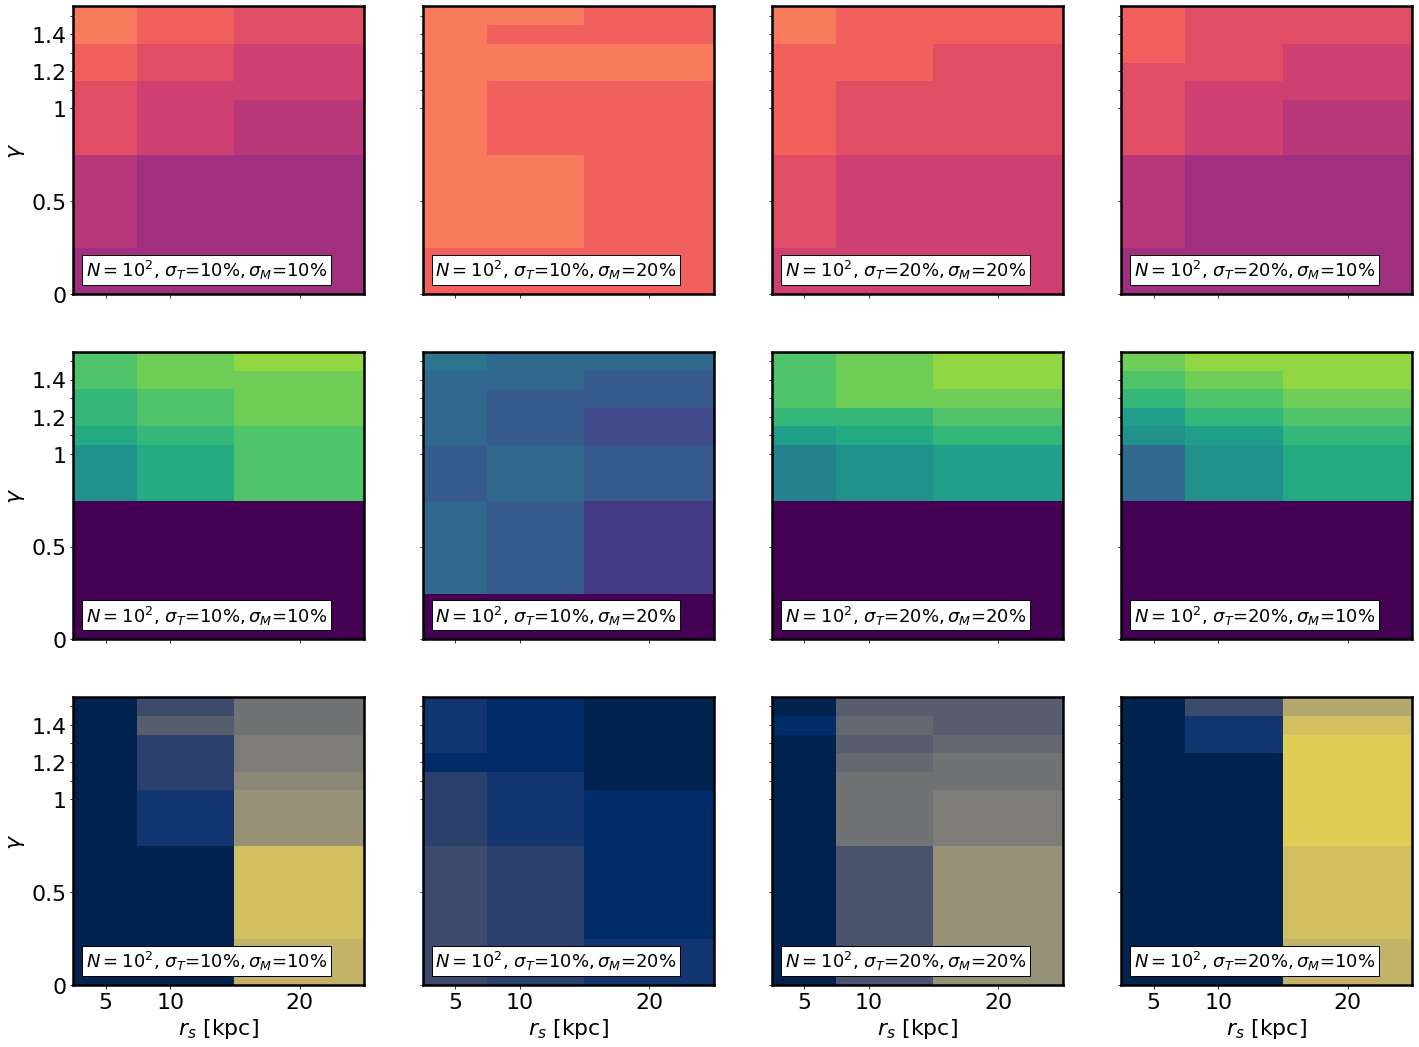

In [2]:
fig, ax = plt.subplots(3, 4, figsize=(24, 18))

path = "/home/mariacst/exoplanets/results/Tmin/"

im   = grid_FSE(path, 100, 0.1, 0.1, "ex4", ax[0, 0], "median", True, False, True, False)
im   = grid_FSE(path, 100, 0.1, 0.2, "ex4", ax[0, 1], "median", True, False, False, False)
im   = grid_FSE(path, 100, 0.2, 0.2, "ex4", ax[0, 2], "median", True, False, False, False)
im   = grid_FSE(path, 100, 0.2, 0.1, "ex5", ax[0, 3], "median", True, False, False, False)

im   = grid_FSE(path, 100, 0.1, 0.1, "ex4", ax[1, 0], "median", False, True, True, False)
im   = grid_FSE(path, 100, 0.1, 0.2, "ex4", ax[1, 1], "median", False, True, False, False)
im   = grid_FSE(path, 100, 0.2, 0.2, "ex4", ax[1, 2], "median", False, True, False, False)
im   = grid_FSE(path, 100, 0.2, 0.1, "ex5", ax[1, 3], "median", False, True, False, False)

im   = grid_FSE(path, 100, 0.1, 0.1, "ex4", ax[2, 0], "median", False, False, True, True)
im   = grid_FSE(path, 100, 0.1, 0.2, "ex4", ax[2, 1], "median", False, False, False, True)
im   = grid_FSE(path, 100, 0.2, 0.2, "ex4", ax[2, 2], "median", False, False, False, True)
im   = grid_FSE(path, 100, 0.2, 0.1, "ex5", ax[2, 3], "median", False, False, False, True)

In the following, we are analysing an observation that contains brown dwarfs with masses between 14 and 30 $M_{jup}$

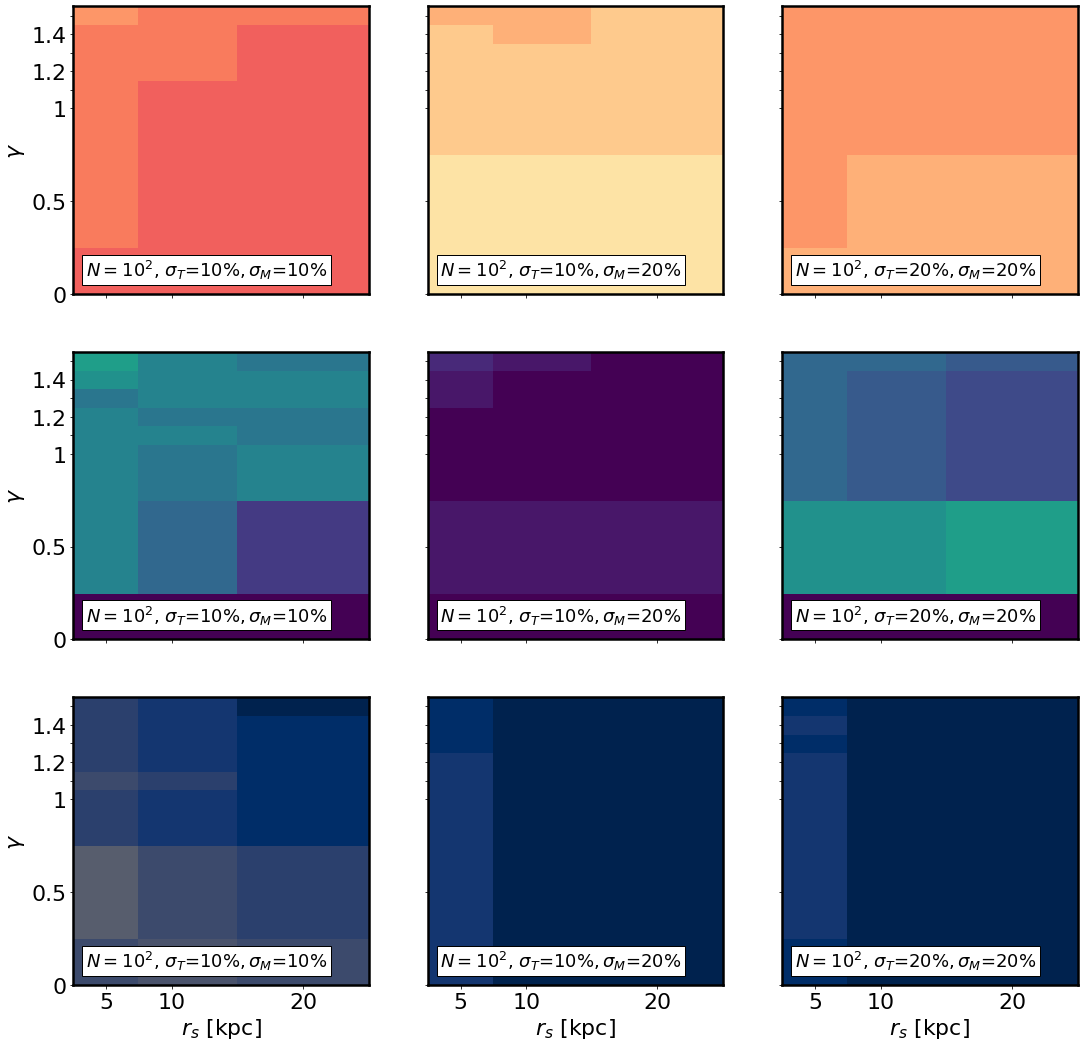

In [3]:
fig, ax = plt.subplots(3, 3, figsize=(18, 18))

path = "/home/mariacst/exoplanets/results/Tmin/"

im   = grid_FSE(path, 100, 0.1, 0.1, "ex16", ax[0, 0], "median", True, False, True, False)
im   = grid_FSE(path, 100, 0.1, 0.2, "ex16", ax[0, 1], "median", True, False, False, False)
im   = grid_FSE(path, 100, 0.2, 0.2, "ex16", ax[0, 2], "median", True, False, False, False)

im   = grid_FSE(path, 100, 0.1, 0.1, "ex16", ax[1, 0], "median", False, True, True, False)
im   = grid_FSE(path, 100, 0.1, 0.2, "ex16", ax[1, 1], "median", False, True, False, False)
im   = grid_FSE(path, 100, 0.2, 0.2, "ex16", ax[1, 2], "median", False, True, False, False)

im   = grid_FSE(path, 100, 0.1, 0.1, "ex16", ax[2, 0], "median", False, False, True, True)
im   = grid_FSE(path, 100, 0.1, 0.2, "ex16", ax[2, 1], "median", False, False, False, True)
im   = grid_FSE(path, 100, 0.2, 0.2, "ex16", ax[2, 2], "median", False, False, False, True)

In [2]:
f = 1.; gamma=1.5; rs=20.; rho0=0.42

path = "./data/"
data = np.genfromtxt(path + "./ATMO_CEQ_vega_MIRI.txt", unpack=True)
points = np.transpose(data[0:2, :])
values = data[2]

In [11]:
nbins = 15
bins_T = np.linspace(250, 2000, nbins)


simu = 100

counts_Tobs0 = np.zeros((simu, nbins-1)); counts_T0 = np.zeros((simu, nbins-1)); 
counts_Tobs1 = np.zeros((simu, nbins-1)); counts_T1 = np.zeros((simu, nbins-1)); 
counts_Tobs2 = np.zeros((simu, nbins-1)); counts_T2 = np.zeros((simu, nbins-1)); 

for i in range(simu):
    robs0, Tobs0, mass0, ages0 = mock_population(100, 0.1, 0.1, f, gamma, rs, 0.42, 650.)
    robs1, Tobs1, mass1, ages1 = mock_population(100, 0.1, 0.2, f, gamma, rs, 0.42, 650.)
    robs2, Tobs2, mass2, ages2 = mock_population(100, 0.2, 0.2, f, gamma, rs, 0.42, 650.)
    
    _xi       = np.transpose(np.asarray([ages0, mass0]))
    _Teff     = griddata(points, values, _xi)
    _heat_int = heat(_Teff, np.ones(len(_Teff))*R_jup.value)
    T0        = temperature_withDM(robs0, _heat_int, f=f, M=mass0*M_sun.value, parameters=[gamma, rs, rho0])
    
    c_Tobs0, _ = np.histogram(Tobs0, bins=bins_T); 
    c_T0, _    = np.histogram(T0, bins=bins_T)

    counts_Tobs0[i] = c_Tobs0
    counts_T0[i]    = c_T0

    _xi       = np.transpose(np.asarray([ages1, mass1]))
    _Teff     = griddata(points, values, _xi)
    _heat_int = heat(_Teff, np.ones(len(_Teff))*R_jup.value)
    T1        = temperature_withDM(robs1, _heat_int, f=f, M=mass1*M_sun.value, parameters=[gamma, rs, rho0])
    
    c_Tobs1, _ = np.histogram(Tobs1, bins=bins_T); 
    c_T1, _    = np.histogram(T1, bins=bins_T)

    counts_Tobs1[i] = c_Tobs1
    counts_T1[i]    = c_T1
    
    _xi       = np.transpose(np.asarray([ages2, mass2]))
    _Teff     = griddata(points, values, _xi)
    _heat_int = heat(_Teff, np.ones(len(_Teff))*R_jup.value)
    T2        = temperature_withDM(robs2, _heat_int, f=f, M=mass2*M_sun.value, parameters=[gamma, rs, rho0])
    
    c_Tobs2, _ = np.histogram(Tobs2, bins=bins_T); 
    c_T2, _    = np.histogram(T2, bins=bins_T)
    
    counts_Tobs2[i] = c_Tobs2
    counts_T2[i]    = c_T2

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


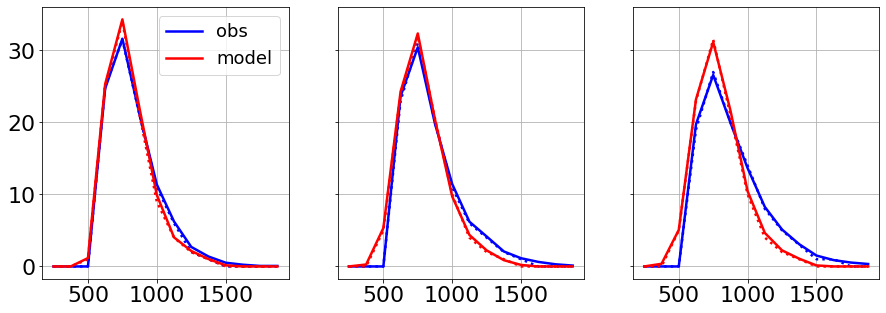

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

ax[0].plot(bins_T[:-1], np.mean(counts_Tobs0, axis=0), color="b", lw=2.5, ls="-", label="obs")
ax[0].plot(bins_T[:-1], np.median(counts_Tobs0, axis=0), color="b", lw=2.5, ls=":")
ax[0].plot(bins_T[:-1], np.mean(counts_T0, axis=0), color="r", lw=2.5, ls="-", label="model")
ax[0].plot(bins_T[:-1], np.median(counts_T0, axis=0), color="r", lw=2.5, ls=":")
ax[0].grid()

ax[1].plot(bins_T[:-1], np.mean(counts_Tobs1, axis=0), color="b", lw=2.5, ls="-", label="obs")
ax[1].plot(bins_T[:-1], np.median(counts_Tobs1, axis=0), color="b", lw=2.5, ls=":")
ax[1].plot(bins_T[:-1], np.mean(counts_T1, axis=0), color="r", lw=2.5, ls="-", label="model")
ax[1].plot(bins_T[:-1], np.median(counts_T1, axis=0), color="r", lw=2.5, ls=":")
ax[1].grid()

ax[2].plot(bins_T[:-1], np.mean(counts_Tobs2, axis=0), color="b", lw=2.5, ls="-", label="obs")
ax[2].plot(bins_T[:-1], np.median(counts_Tobs2, axis=0), color="b", lw=2.5, ls=":")
ax[2].plot(bins_T[:-1], np.mean(counts_T2, axis=0), color="red", lw=2.5, ls="-", label="model")
ax[2].plot(bins_T[:-1], np.median(counts_T2, axis=0), color="red", lw=2.5, ls=":")
ax[2].grid()

ax[0].legend(fontsize=18)

By looking @ corner plot seems there is a bimodality in the solutions for the $\sigma_T=0.1$ and $\sigma_M=0.2$

In [3]:
import emcee

In [4]:
def lnprior(p):
    f, gamma, rs = p
    if ( 0. < gamma < 3. and 0. < f < 1. and 0.01 < rs < 50.):
        return 0.
    return -np.inf

def residual(p, robs, Tobs, relT, heat_int, mass):
    f, gamma, rs = p
    Tmodel = temperature_withDM(robs, heat_int, f=f, M=mass*M_sun.value, parameters=[gamma, rs, rho0])
    # return
    return -0.5*np.sum(((Tmodel-Tobs)/(relT*Tobs))**2.)


def lnprob(p, robs, Tobs, relT, heat_int, mass):
    lp = lnprior(p)
    if not np.isfinite(lp):
        # Return
        return -np.inf
    # Return
    return lp + residual(p, robs, Tobs, relT, heat_int, mass)

In [5]:
f    = 1.; gamma=1.5; rs=20.; rho0=0.42
nBDs = 100; rel_unc_Tobs=0.10; rel_mass=0.20

path = "./data/"
data = np.genfromtxt(path + "./ATMO_CEQ_vega_MIRI.txt", unpack=True)
points = np.transpose(data[0:2, :])
values = data[2]

np.random.seed(7)#18)#42)
robs1, Tobs1, mass1, ages1 = mock_population(nBDs, rel_unc_Tobs, rel_mass, f, gamma, rs, 0.42, 650.)
## calculate predictic intrinsic heat flow for mock BDs
xi       = np.transpose(np.asarray([ages1, mass1]))
Teff     = griddata(points, values, xi)
heat_int = heat(Teff, np.ones(len(Teff))*R_jup.value)
# ------------------ RECONSTRUCTION --------------------------------------
ndim     = 3
nwalkers = 50
# first guess
p0 = [[0.9, 0.9, 20.] + 1e-4*np.random.randn(ndim) for j in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(robs1, Tobs1, 0.1, heat_int, mass1))
pos, prob, state  = sampler.run_mcmc(p0, 300, progress=True)
sampler.reset()
pos, prob, state  = sampler.run_mcmc(pos, 5000, progress=True)
# Save posterior
file_object = open(("posterior_N%i_relunc%.2f_relM%.2f_f%.1fgamma%.1frs%.1f_5" 
                    %(nBDs, rel_unc_Tobs, rel_mass, f, gamma, rs)), "wb")
pickle.dump(sampler.flatchain, file_object, protocol=2)
file_object.close()


100%|██████████| 5000/5000 [08:08<00:00, 10.23it/s]


In [6]:
import _corner

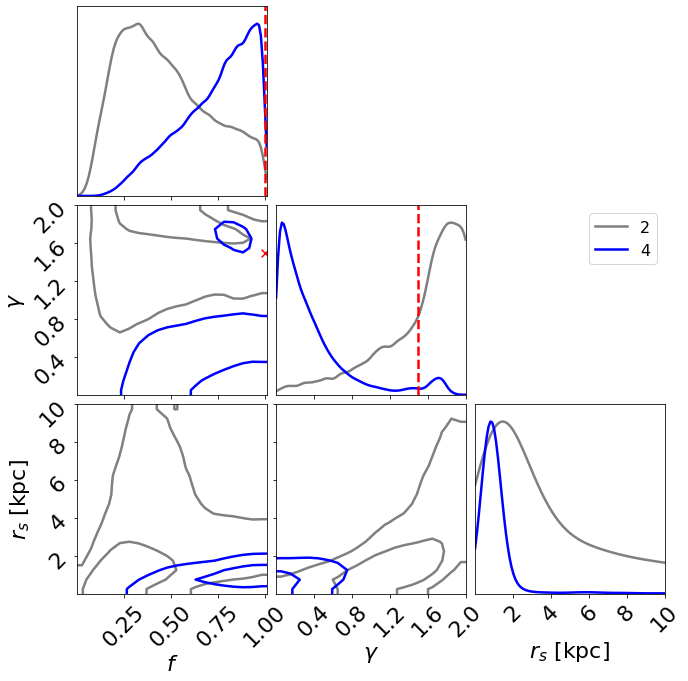

In [8]:
_file    = open(("posterior_N%i_relunc%.2f_relM%.2f_f1.0gamma%.1frs%.1f_2" 
                 %(nBDs, rel_unc_Tobs, rel_mass, gamma, rs)), "rb") 
samples1  = pickle.load(_file)
smooth=1.
fig, axes = corner(samples1, levels=(1-np.exp(-0.5), 1-np.exp(-2)), plot_datapoints=False, 
                   plot_density=False, fill_contours=False, smooth=smooth, color="grey", 
                   range=[(0., 1.01), (0., 2.), (0., 10.)])
# plot KDE smoothed version of distributions
for axidx, samps in zip([0, 4, 8], samples1.T):
    kde   = gaussian_kde(samps)
    xvals = fig.axes[axidx].get_xlim()
    xvals = np.linspace(xvals[0], xvals[1], 100)
    fig.axes[axidx].plot(xvals, kde(xvals)/np.max(kde(xvals)), color="grey", lw=2.5)    


_file    = open(("posterior_N%i_relunc%.2f_relM%.2f_f1.0gamma%.1frs%.1f_4" 
                 %(nBDs, rel_unc_Tobs, rel_mass, gamma, rs)), "rb") 
samples2  = pickle.load(_file)

smooth=1.
corner(samples2, levels=(1-np.exp(-0.5), 1-np.exp(-2)), plot_datapoints=False, 
       plot_density=False, fill_contours=False, smooth=smooth, color="blue", 
       range=[(0., 1.01), (0., 2.), (0., 10.)], fig=fig)
# plot KDE smoothed version of distributions
for axidx, samps in zip([0, 4, 8], samples2.T):
    kde   = gaussian_kde(samps)
    xvals = fig.axes[axidx].get_xlim()
    xvals = np.linspace(xvals[0], xvals[1], 100)
    fig.axes[axidx].plot(xvals, kde(xvals)/np.max(kde(xvals)), color="blue", lw=2.5)

axes[0, 0].axvline(1., color="r", ls="--", lw=2.5)
axes[1, 1].axvline(1.5, color="r", ls="--", lw=2.5)
axes[2, 2].axvline(20., color="r", ls="--", lw=2.5)
axes[1, 0].scatter(1., 1.5, marker="x", color="red", s=60)
axes[2, 0].scatter(1., 20., marker="x", color="red", s=60)
axes[2, 1].scatter(1.5, 20, marker="x", color="red", s=60)
    
axes[1, 0].set_ylabel(r"$\gamma$")
axes[2, 0].set_xlabel(r"$f$")
axes[2, 0].set_ylabel(r"$r_s$ [kpc]")
axes[2, 1].set_xlabel(r"$\gamma$")
axes[2, 2].set_xlabel(r"$r_s$ [kpc]")

colors = ['grey', 'blue']
lines = [Line2D([0], [0], color=c, linewidth=2.5, linestyle='-') for c in colors]
labels = ['2', '4']
axes[1, 2].legend(lines, labels, fontsize=16)

In [10]:
f    = 1.; gamma=1.5; rs=20.; rho0=0.42
nBDs = 100; rel_unc_Tobs=0.10; rel_mass=0.20

path = "./data/"
data = np.genfromtxt(path + "./ATMO_CEQ_vega_MIRI.txt", unpack=True)
points = np.transpose(data[0:2, :])
values = data[2]

np.random.seed(18)
robs2, Tobs2, mass2, ages2 = mock_population(nBDs, rel_unc_Tobs, rel_mass, f, gamma, rs, 0.42, 650.)
xi       = np.transpose(np.asarray([ages2, mass2]))
Teff2    = griddata(points, values, xi)
heat_int = heat(Teff2, np.ones(len(Teff2))*R_jup.value)
T2       = temperature_withDM(robs2, heat_int, f=f, M=mass2*M_sun.value, parameters=[gamma, rs, rho0])

np.random.seed(7)
robs4, Tobs4, mass4, ages4 = mock_population(nBDs, rel_unc_Tobs, rel_mass, f, gamma, rs, 0.42, 650.)
xi       = np.transpose(np.asarray([ages4, mass4]))
Teff4    = griddata(points, values, xi)
heat_int = heat(Teff4, np.ones(len(Teff4))*R_jup.value)
T4       = temperature_withDM(robs4, heat_int, f=f, M=mass4*M_sun.value, parameters=[gamma, rs, rho0])

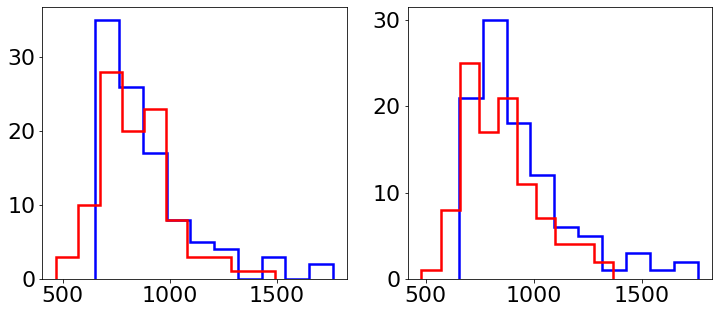

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

_, bins, _ = ax[0].hist(Tobs2, histtype="step", lw=2.5, color="b")
_, _, _    = ax[0].hist(T2, histtype="step", lw=2.5, color="red")
#_, _, _    = ax[0].hist(Teff2, bins=bins, histtype="step", lw=2.5, color="g")

_, _, _ = ax[1].hist(Tobs4, bins=bins, histtype="step", lw=2.5, color="b")
_, _, _ = ax[1].hist(T4, histtype="step", lw=2.5, color="red")
#_, _, _ = ax[1].hist(Teff4, bins=bins, histtype="step", lw=2.5, color="g")

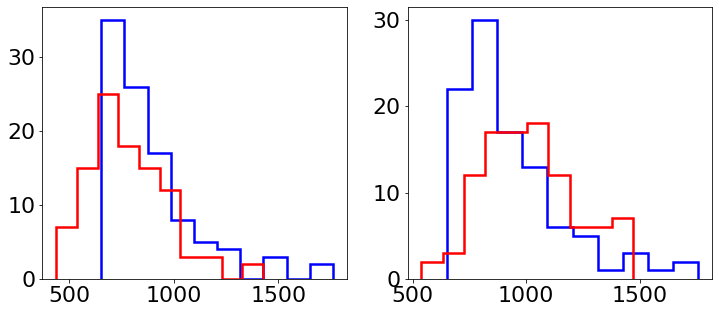

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

_, bins, _ = ax[0].hist(Tobs2, histtype="step", lw=2.5, color="b")

xi       = np.transpose(np.asarray([ages2, mass2]))
Teff2    = griddata(points, values, xi)
heat_int = heat(Teff2, np.ones(len(Teff2))*R_jup.value)
T2       = temperature_withDM(robs2, heat_int, f=f, M=mass2*M_sun.value, parameters=[0.1, 5., rho0])

_, _, _    = ax[0].hist(T2, histtype="step", lw=2.5, color="red")
#_, _, _    = ax[0].hist(Teff2, bins=bins, histtype="step", lw=2.5, color="g")

_, _, _ = ax[1].hist(Tobs4, histtype="step", lw=2.5, color="b")

xi       = np.transpose(np.asarray([ages4, mass4]))
Teff4    = griddata(points, values, xi)
heat_int = heat(Teff4, np.ones(len(Teff4))*R_jup.value)
T4       = temperature_withDM(robs4, heat_int, f=f, M=mass4*M_sun.value, parameters=[2., 5., rho0])
_, _, _ = ax[1].hist(T4, histtype="step", lw=2.5, color="red")
#_, _, _ = ax[1].hist(Teff4, bins=bins, histtype="step", lw=2.5, color="g")

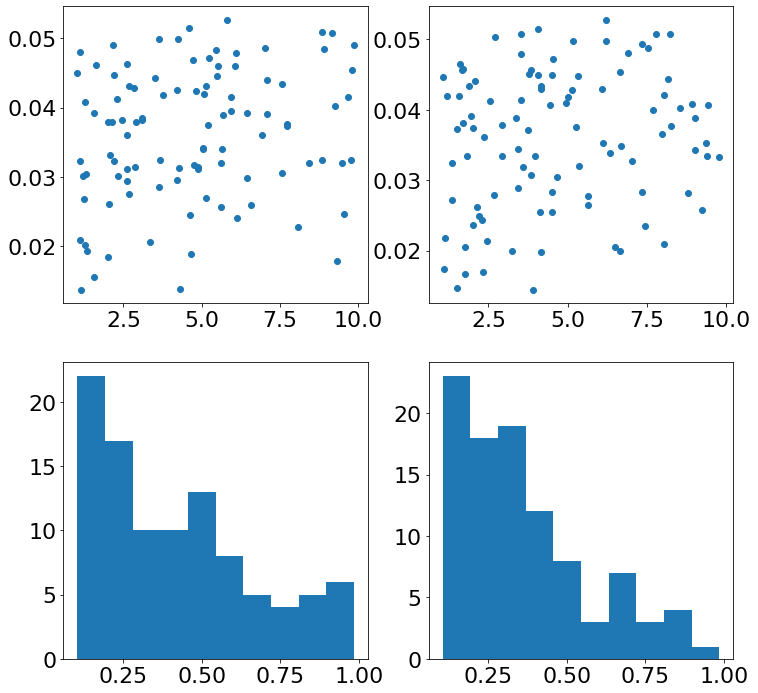

In [27]:
fig, ax  = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].scatter(ages2, mass2)
ax[0, 1].scatter(ages4, mass4)

_, bins, _ = ax[1, 0].hist(robs2)
_, bins, _ = ax[1, 1].hist(robs4, bins=bins)